epoch:0, train acc:0.10333333333333333, test acc:0.0768
epoch:1, train acc:0.13333333333333333, test acc:0.0965
epoch:2, train acc:0.13666666666666666, test acc:0.1154
epoch:3, train acc:0.19, test acc:0.1346
epoch:4, train acc:0.21333333333333335, test acc:0.1588
epoch:5, train acc:0.23666666666666666, test acc:0.1716
epoch:6, train acc:0.2733333333333333, test acc:0.193
epoch:7, train acc:0.29, test acc:0.2098
epoch:8, train acc:0.3233333333333333, test acc:0.2373
epoch:9, train acc:0.36333333333333334, test acc:0.2636
epoch:10, train acc:0.43333333333333335, test acc:0.2877
epoch:11, train acc:0.45, test acc:0.3067
epoch:12, train acc:0.4766666666666667, test acc:0.3168
epoch:13, train acc:0.49, test acc:0.3258
epoch:14, train acc:0.5166666666666667, test acc:0.3531
epoch:15, train acc:0.54, test acc:0.375
epoch:16, train acc:0.5633333333333334, test acc:0.3857
epoch:17, train acc:0.5666666666666667, test acc:0.3864
epoch:18, train acc:0.59, test acc:0.4063
epoch:19, train acc:0.63,

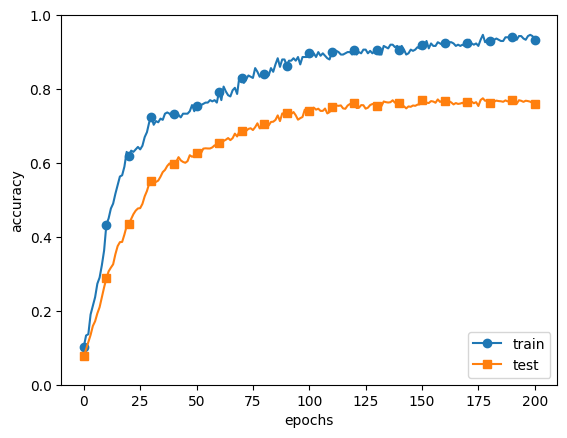

In [1]:
# coding: utf-8
# overfit_weight_decay.py
import os
import sys

sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 为了再现过拟合，减少学习数据
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（权值衰减）的设定 =======================
#weight_decay_lambda = 0 # 不使用权值衰减的情况
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.绘制图形==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## 6.4.3 Dropout

train loss:2.3122639964317626
=== epoch:1, train acc:0.12333333333333334, test acc:0.1315 ===
train loss:2.29434105550943
train loss:2.3168028343009355
train loss:2.3097431488324776
=== epoch:2, train acc:0.12, test acc:0.1306 ===
train loss:2.305811355169225
train loss:2.2974843046747337
train loss:2.309462531235692
=== epoch:3, train acc:0.12666666666666668, test acc:0.1283 ===
train loss:2.3067295985778147
train loss:2.306534780630863
train loss:2.3038139684119345
=== epoch:4, train acc:0.12333333333333334, test acc:0.1303 ===
train loss:2.295824056503867
train loss:2.2879414683071655
train loss:2.3134724043014745
=== epoch:5, train acc:0.13, test acc:0.1331 ===
train loss:2.2929528391567886
train loss:2.303055057498935
train loss:2.299625588526434
=== epoch:6, train acc:0.13, test acc:0.1333 ===
train loss:2.2972226925321353
train loss:2.3009519557391034
train loss:2.300406995699858
=== epoch:7, train acc:0.13333333333333333, test acc:0.1328 ===
train loss:2.2944108514781756
train 

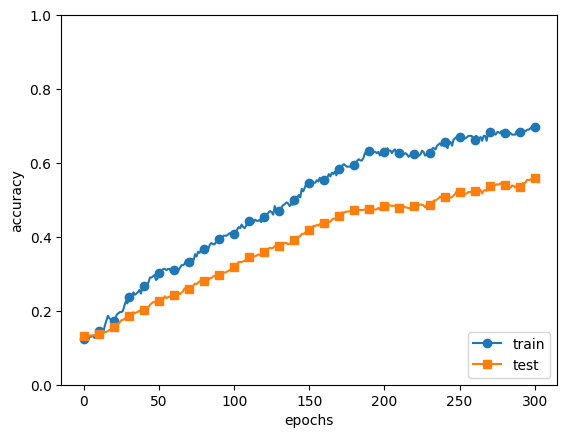

In [2]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 为了再现过拟合，减少学习数据
x_train = x_train[:300]
t_train = t_train[:300]

# 设定是否使用Dropuout，以及比例 ========================
use_dropout = True  # 不使用Dropout的情况下为False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 绘制图形==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()